In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS


Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 18.3MB/s]


In [3]:
df = pd.read_csv('insurance.csv')
print(df.head())

   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1 

In [4]:
df.shape


(986, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [6]:
df.isnull().sum()


,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


There are 986 rows and 11 columns No missing data

In [7]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


Average Age is 41.75 years, with Minimum age 18 years and maximum 66 years
Average height is 168.18 cm and minimum height 145 cm and maximum height 188 cm.
Average weight is 76.95 Kg with minimum weight 51 kg and maximum 132 kg
average premium price is 24336.71 with minimum 15000 and maximum 40000. All values looks acceptable and there are no impossible values in the data from description.

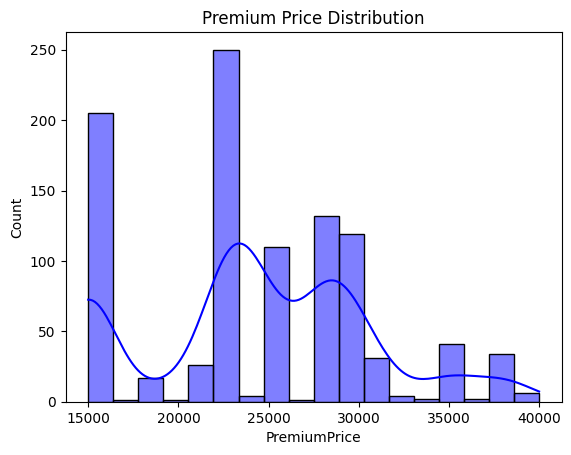

In [8]:
# Distributuion of premium price
sns.histplot(df['PremiumPrice'], kde=True, color='blue')
plt.title('Premium Price Distribution')
plt.show()

Shapiro-Wilk Test on Original Data (PremiumPrice):
Statistic: 0.9272103355803877, p-value: 1.8798914833418392e-21


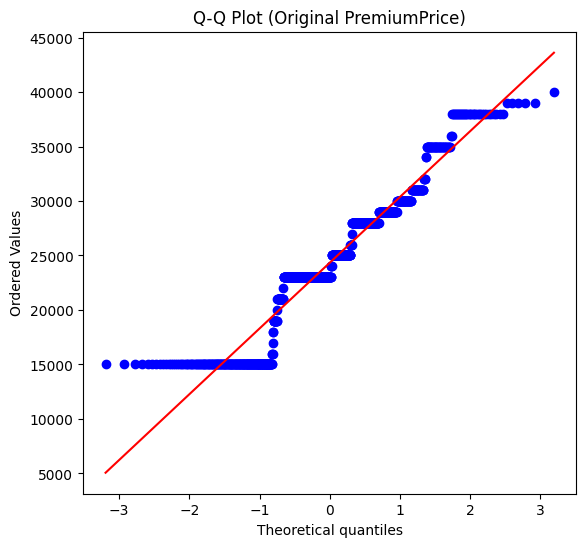

In [9]:
import scipy.stats as stats
from scipy.stats import shapiro
# Step 1: Q-Q Plot and Shapiro-Wilk Test
plt.figure(figsize=(14, 6))

# Q-Q plot for original PremiumPrice
plt.subplot(1, 2, 1)
stats.probplot(df['PremiumPrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Original PremiumPrice)')

# Shapiro-Wilk Test for normality on original data
stat, p_value = shapiro(df['PremiumPrice'])
print("Shapiro-Wilk Test on Original Data (PremiumPrice):")
print(f"Statistic: {stat}, p-value: {p_value}")

In [10]:
# Calculate BMI
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

New feature BMI is created using height and weight

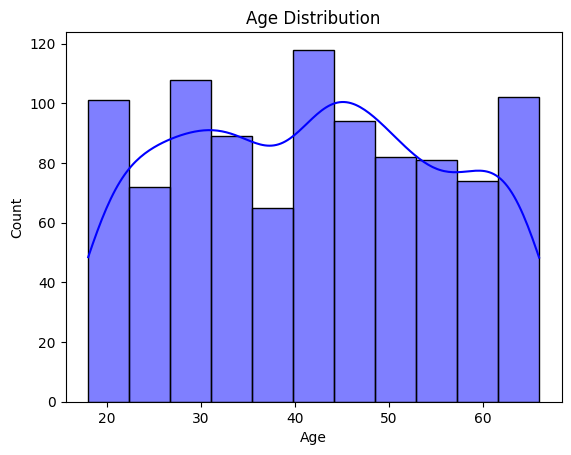

In [11]:
# Distributuion of age
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

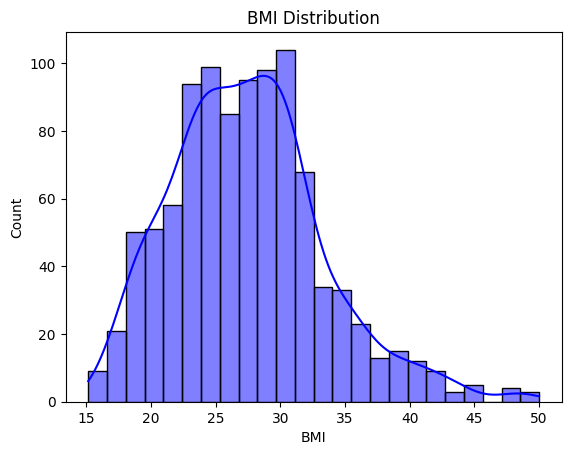

In [12]:
# Distributuion of age
sns.histplot(df['BMI'], kde=True, color='blue')
plt.title('BMI Distribution')
plt.show()

Age and BMI have near-normal distributions.
Premium price is right-skewed and doesn't fit a normal distribution well, even after transformation.


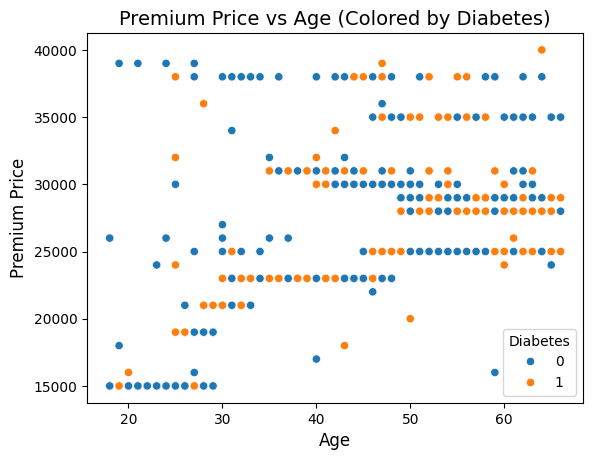

In [13]:
sns.scatterplot(x='Age', y='PremiumPrice', hue='Diabetes', data=df)
plt.title('Premium Price vs Age (Colored by Diabetes)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Premium Price', fontsize=12)
#plt.legend( labels=['No', 'Yes'])
plt.show()

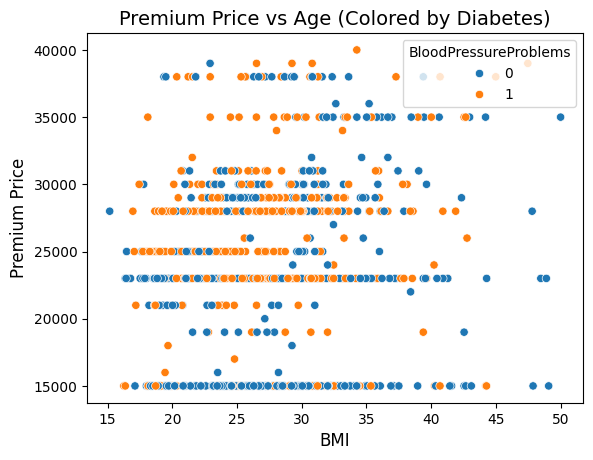

In [14]:
sns.scatterplot(x='BMI', y='PremiumPrice', hue='BloodPressureProblems', data=df)
plt.title('Premium Price vs Age (Colored by Diabetes)', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Premium Price', fontsize=12)
#plt.legend( labels=['No', 'Yes'])
plt.show()

It is observed in general high premium price for higher age but the relation is not linear but complex.
relation between BMI and premium price is also corelated observed from Tableau Dashboad but patern looks again complex

Age: 0 outliers
Height: 0 outliers
Weight: 16 outliers
PremiumPrice: 6 outliers


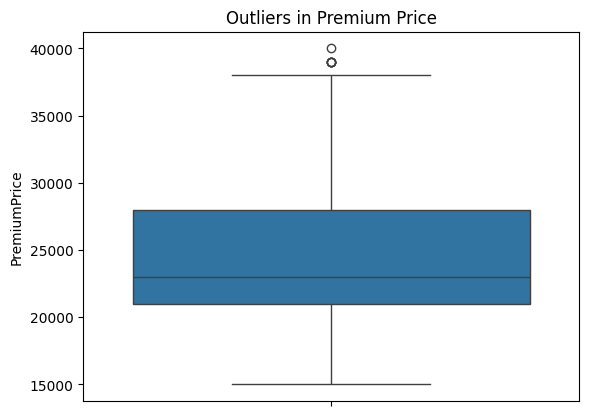

In [15]:
# IQR Method for Outlier Detection
for column in ['Age', 'Height', 'Weight', 'PremiumPrice']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")

# Boxplot for Outliers in Premium Price
sns.boxplot(df['PremiumPrice'])
plt.title('Outliers in Premium Price')
plt.show()

There are not much outliers exist, the outliers in Premium price are not seems to be unrealistic and not considering outlier sensitive model such as KNN decided to keep the outliers, I have checked by remving outlier performce of models didnt find much diffrence.

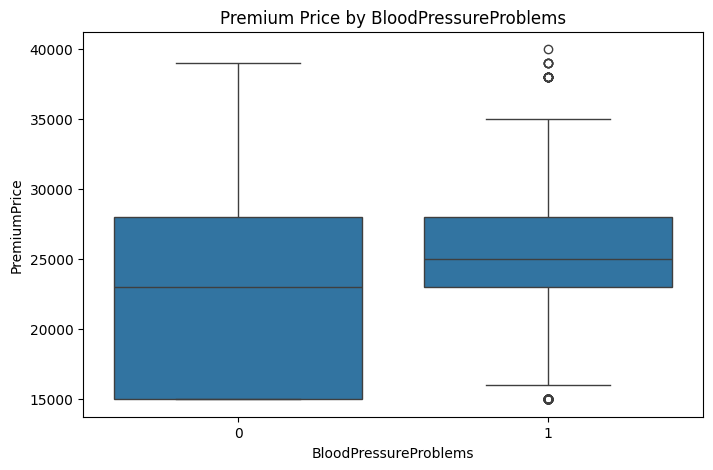

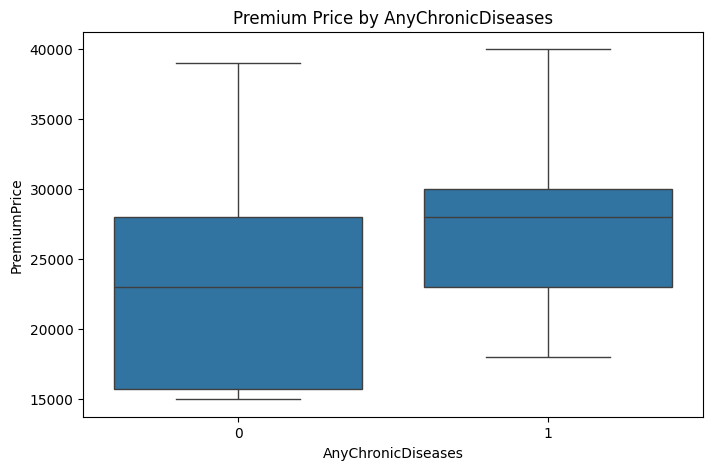

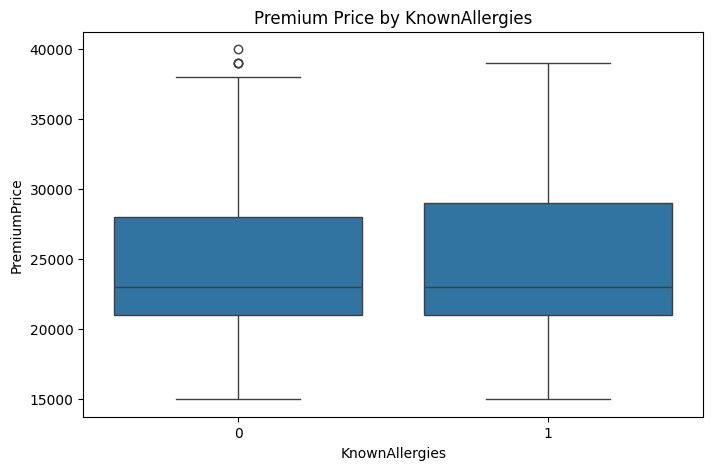

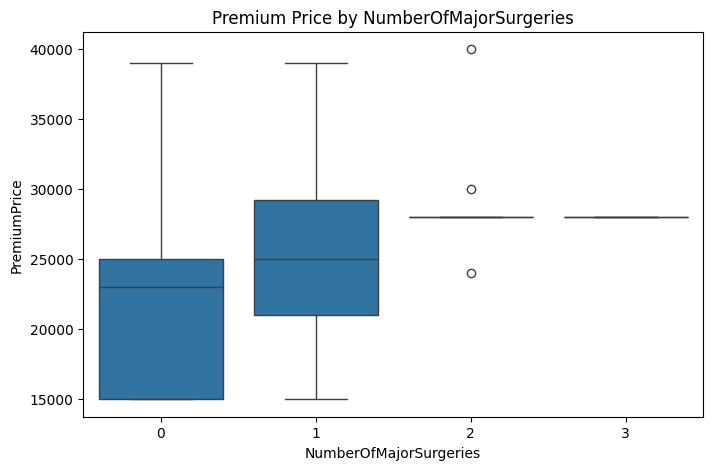

In [16]:
#Box plot
columns_to_plot = [ "BloodPressureProblems", "AnyChronicDiseases", "KnownAllergies", "NumberOfMajorSurgeries"]


# Box plot primiumprie by Diabetes
for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x= col, y='PremiumPrice', data=df)
    plt.title(f'Premium Price by {col}' )
    plt.show()


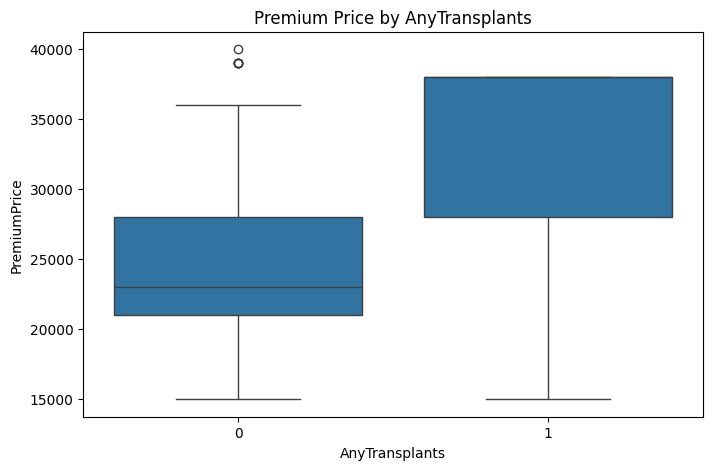

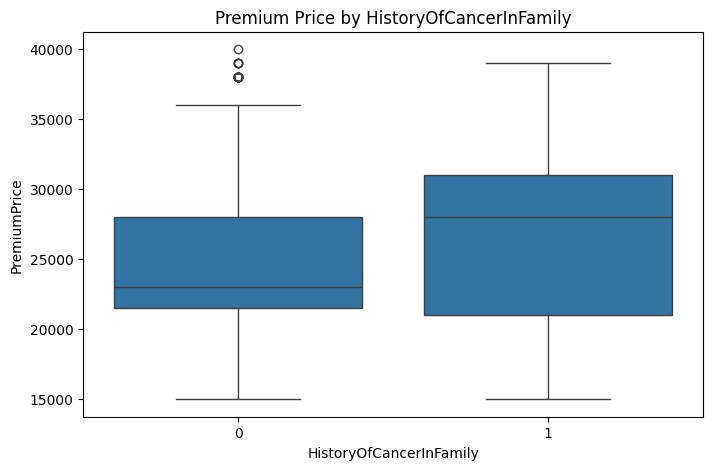

In [17]:
#Box plot
columns_to_plot = [ "AnyTransplants", "HistoryOfCancerInFamily"]


# Box plot primiumprie by Diabetes
for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x= col, y='PremiumPrice', data=df)
    plt.title(f'Premium Price by {col}' )
    plt.show()



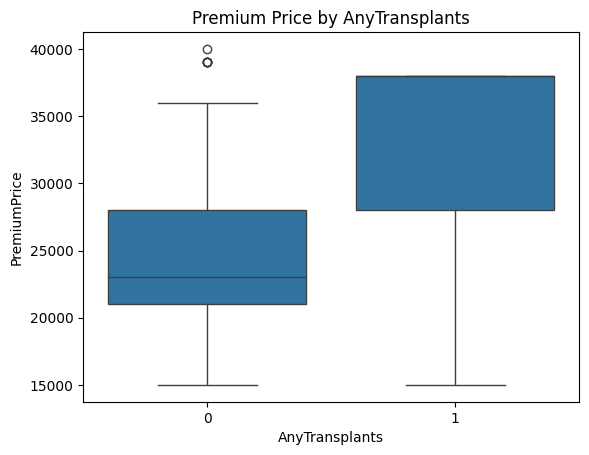

In [18]:
# Box plot primiumprie by AnyTransplants
sns.boxplot(x='AnyTransplants', y='PremiumPrice', data=df)
plt.title('Premium Price by AnyTransplants')
plt.show()


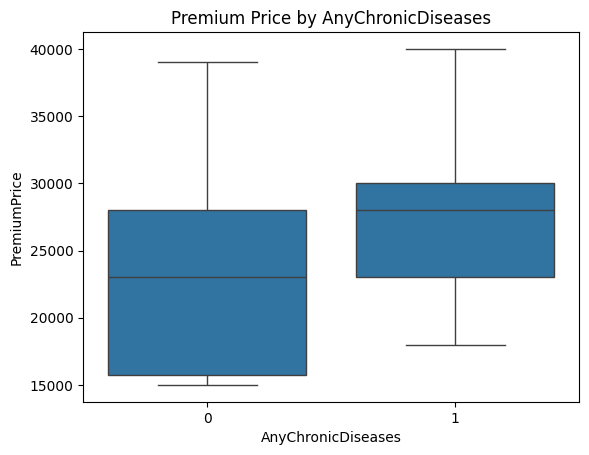

In [19]:
# Box plot primiumprie by AnyChronicDiseases
sns.boxplot(x='AnyChronicDiseases', y='PremiumPrice', data=df)
plt.title('Premium Price by AnyChronicDiseases')
plt.show()


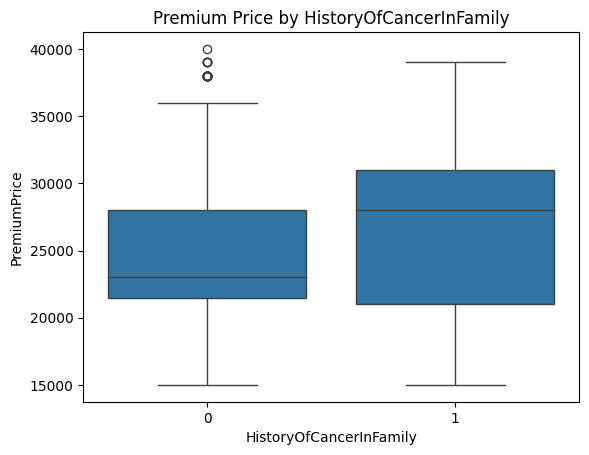

In [20]:
# Box plot primiumprie by HistoryOfCancerInFamily
sns.boxplot(x='HistoryOfCancerInFamily', y='PremiumPrice', data=df)
plt.title('Premium Price by HistoryOfCancerInFamily')
plt.show()


The mean premium price for people with chronic diseases is higher than those without.
The mean premium price for diabetic individuals is higher than non-diabetics.
Individuals with blood pressure problems have a higher mean premium than those without.
No significant difference in mean premium price between individuals with and without allergies
Individuals with a family history of cancer have a higher mean premium than those without.
The mean premium price increases with the number of major surgeries.

Chronic Diseases vs. Premium Price
Null Hypothesis (H₀): The mean premium price for individuals with chronic diseases is equal to the mean premium price for those without chronic diseases.
Alternative Hypothesis (H₁): The mean premium price for individuals with chronic diseases is different from those without chronic diseases.

In [21]:
from scipy.stats import ttest_ind
# T-test: Chronic Diseases vs. Premium Price
group1 = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']
group2 = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")

T-test: t-statistic = -6.69104572734849, p-value = 3.713413765291482e-11


The p-value is much smaller than the common significance level (0.05), so we reject the null hypothesis. This suggests that having chronic diseases significantly affects premium pricing.

H₀: There is no difference in mean premium price between individuals with and without diabetes.
H₁: There is a difference in mean premium price for individuals with and without diabetes.


In [22]:
# T-test:Diabetes vs. Premium Price
group1 = df[df['Diabetes'] == 0]['PremiumPrice']
group2 = df[df['Diabetes'] == 1]['PremiumPrice']
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")

T-test: t-statistic = -2.3975629574233563, p-value = 0.01669009138530611


Since the p-value is less than 0.05, we reject the null hypothesis. This suggests that diabetes has a statistically significant impact on premium pricing.

H₀: No difference in mean premium price between individuals with and without blood pressure problems.
H₁: A significant difference in premium price between individuals with and without blood pressure problems.

In [23]:
# T-test:BloodPressureProblems vs. Premium Price
group1 = df[df['BloodPressureProblems'] == 0]['PremiumPrice']
group2 = df[df['BloodPressureProblems'] == 1]['PremiumPrice']
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")

T-test: t-statistic = -5.316365561489142, p-value = 1.3100497090721927e-07


The p-value is very small, leading us to reject the null hypothesis. Blood pressure problems significantly affect premium pricing.

H₀: No difference in mean premium price between individuals with and without known allergies.
H₁: A significant difference in premium price based on allergies.


In [24]:
# T-test:KnownAllergies vs. Premium Price
group1 = df[df['KnownAllergies'] == 0]['PremiumPrice']
group2 = df[df['KnownAllergies'] == 1]['PremiumPrice']
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")

T-test: t-statistic = -0.3796775160044091, p-value = 0.7042667378180334


Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This suggests that allergies do not significantly impact premium pricing.

H₀: No difference in mean premium price based on family history of cancer.
H₁: A significant difference in premium price based on family history of cancer.

In [25]:
# T-test:HistoryOfCancerInFamily vs. Premium Price
group1 = df[df['HistoryOfCancerInFamily'] == 0]['PremiumPrice']
group2 = df[df['HistoryOfCancerInFamily'] == 1]['PremiumPrice']
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")

T-test: t-statistic = -2.617041984412821, p-value = 0.009005587310447026


Null Hypothesis (H₀): There is no difference in mean premium price across different numbers of major surgeries.
Alternative Hypothesis (H₁): There is at least one significant difference in premium price among the different surgery groups.


The p-value is less than 0.05, so we reject the null hypothesis. A family history of cancer has a statistically significant impact on premium pricing.


In [26]:
from scipy.stats import f_oneway
# Combine groups with 2 and 3 surgeries into a single group
df['NumberOfMajorSurgeries_Combined'] = df['NumberOfMajorSurgeries'].apply(lambda x: x if x < 2 else 2)

# Perform ANOVA on the combined groups
anova_results = f_oneway(
    df[df['NumberOfMajorSurgeries_Combined'] == 0]['PremiumPrice'],
    df[df['NumberOfMajorSurgeries_Combined'] == 1]['PremiumPrice'],
    df[df['NumberOfMajorSurgeries_Combined'] == 2]['PremiumPrice']
)

print(f"ANOVA: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")

ANOVA: F-statistic = 39.2415277169692, p-value = 4.0158930660447635e-17


The p-value is extremely small, leading us to reject the null hypothesis. This indicates that the number of major surgeries significantly impacts premium pricing.


In [27]:
from scipy.stats import spearmanr

# Perform Spearman correlation
corr, p_value = spearmanr(df['Age'], df['PremiumPrice'])

print(f"Spearman Correlation Coefficient: {corr}, p-value: {p_value}")

Spearman Correlation Coefficient: 0.7390879945416008, p-value: 4.892782893102605e-171


In [28]:
corr, p_value = spearmanr(df['BMI'], df['PremiumPrice'])

print(f"Spearman Correlation Coefficient: {corr}, p-value: {p_value}")

Spearman Correlation Coefficient: 0.09787515015644242, p-value: 0.002092120945688526


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# Split data for model
X = df.drop(columns=['PremiumPrice','Weight' ,'Height','NumberOfMajorSurgeries_Combined' ])
y = df['PremiumPrice']

In [33]:
X_t = pd.DataFrame(X, columns=X.columns)
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Age,9.94
8,BMI,7.52
7,NumberOfMajorSurgeries,2.41
2,BloodPressureProblems,2.07
1,Diabetes,1.85
5,KnownAllergies,1.31
4,AnyChronicDiseases,1.23
6,HistoryOfCancerInFamily,1.21
3,AnyTransplants,1.06


In [34]:
from sklearn.model_selection import train_test_split
# Random data points are split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
#Standardization
from sklearn.preprocessing import StandardScaler
numerical_features = ['Age', 'BMI', 'NumberOfMajorSurgeries']

std=StandardScaler()

X_train[numerical_features] = std.fit_transform(X_train[numerical_features])
X_test[numerical_features] = std.transform(X_test[numerical_features])

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [39]:
# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [41]:
# Ensure all variables are numpy arrays
y_train = np.array(y_train, dtype=np.float64)
y_train_pred = np.array(y_train_pred, dtype=np.float64)
y_test = np.array(y_test, dtype=np.float64)
y_test_pred = np.array(y_test_pred, dtype=np.float64)

# Evaluate training data
print("Linear Regression (Training):")
print(f"  Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_train_pred):.2f}")
#print(f"  Root Mean Squared Error (RMSE): {mean_squared_error(y_train, y_train_pred, squared=False):.2f}")
print(f"  R² Score: {r2_score(y_train, y_train_pred):.2f}")
print("-" * 50)

# Evaluate test data
print("Linear Regression (Test):")
print(f"  Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_pred):.2f}")
#print(f"  Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_test_pred, squared=False):.2f}")
print(f"  R² Score: {r2_score(y_test, y_test_pred):.2f}")

Linear Regression (Training):
  Mean Absolute Error (MAE): 2716.71
  R² Score: 0.61
--------------------------------------------------
Linear Regression (Test):
  Mean Absolute Error (MAE): 2629.65
  R² Score: 0.71


Performed Linear Regression to establish a baseline model.
Evaluated performance using MAE (Mean Absolute Error) and R² Score.
Observed R² Score of 0.61 (Train) and 0.71 (Test), indicating the model explains 61%-71% of the variance in premium pricing.

In [42]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=10)  # Try different alphas (1, 10, 100)
ridge.fit(X_train, y_train)
print("Ridge Test R² Score:", ridge.score(X_test, y_test))

lasso = Lasso(alpha=0.1)  # Can be adjusted for feature selection
lasso.fit(X_train, y_train)
print("Lasso Test R² Score:", lasso.score(X_test, y_test))

Ridge Test R² Score: 0.69416552632858
Lasso Test R² Score: 0.7078127223018365


In [43]:
# Extract feature importance from Lasso model
lasso_coeffs = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso.coef_})
lasso_coeffs = lasso_coeffs.sort_values(by='Coefficient', ascending=False)
print(lasso_coeffs)

                   Feature  Coefficient
3           AnyTransplants  7408.556869
0                      Age  4576.116059
4       AnyChronicDiseases  2559.618256
6  HistoryOfCancerInFamily  2127.483265
8                      BMI   843.330752
5           KnownAllergies   167.039609
2    BloodPressureProblems    82.834466
1                 Diabetes  -364.889503
7   NumberOfMajorSurgeries  -503.873430


In [45]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    #print(f"  Root Mean Squared Error (RMSE): {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"  R² Score: {r2_score(y_true, y_pred):.2f}")
    print("-" * 50)
selected_features = ['AnyTransplants', 'Age', 'AnyChronicDiseases', 'HistoryOfCancerInFamily', 'BMI', 'KnownAllergies','NumberOfMajorSurgeries']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain Lasso
lasso_selected = Lasso(alpha=0.1)
lasso_selected.fit(X_train_selected, y_train)
evaluate_model(y_test, lasso_selected.predict(X_test_selected), "Lasso (Selected Features)")


Lasso (Selected Features):
  Mean Absolute Error (MAE): 2645.62
  R² Score: 0.71
--------------------------------------------------


Applied Ridge (L2) and Lasso (L1) regression to reduce overfitting and perform feature selection.
Lasso Regression provided feature importance by driving some coefficients to zero.
The top selected features: AnyTransplants, Age, AnyChronicDiseases, HistoryOfCancerInFamily, BMI.

In [46]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the model on training and test data
evaluate_model(y_train, rf_model.predict(X_train), "Random Forest (Training)")
evaluate_model(y_test, rf_model.predict(X_test), "Random Forest (Test)")

Random Forest (Training):
  Mean Absolute Error (MAE): 627.47
  R² Score: 0.96
--------------------------------------------------
Random Forest (Test):
  Mean Absolute Error (MAE): 1438.84
  R² Score: 0.86
--------------------------------------------------


Used Random Forest (ensemble method) to capture non-linear relationships.
This is clearly showing overfitting

In [47]:
rf = RandomForestRegressor(
    n_estimators=100,       # Reduce number of trees
    max_depth=10,           # Limit tree depth
    min_samples_split=5,    # Minimum samples to split a node
    min_samples_leaf=4,     # Minimum samples per leaf
    random_state=42
)

rf.fit(X_train, y_train)
# Evaluate the model on training and test data
evaluate_model(y_train, rf.predict(X_train), "Random Forest (Training)")
evaluate_model(y_test, rf.predict(X_test), "Random Forest (Test)")

Random Forest (Training):
  Mean Absolute Error (MAE): 1271.10
  R² Score: 0.83
--------------------------------------------------
Random Forest (Test):
  Mean Absolute Error (MAE): 1557.40
  R² Score: 0.85
--------------------------------------------------


Reduced complexity by tuning hyperparameters (max_depth, min_samples_split, etc.)

                   Feature  Importance
0                      Age    0.719483
3           AnyTransplants    0.094769
8                      BMI    0.079632
4       AnyChronicDiseases    0.042026
7   NumberOfMajorSurgeries    0.027418
6  HistoryOfCancerInFamily    0.020976
2    BloodPressureProblems    0.008451
1                 Diabetes    0.004912
5           KnownAllergies    0.002335


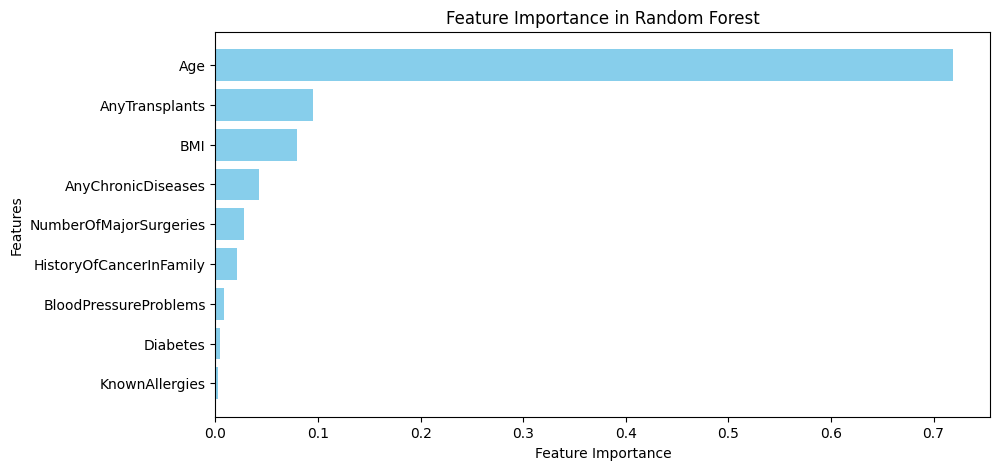

In [48]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

# Sort in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [49]:
# List of features to drop (low importance)
features_to_drop = ["KnownAllergies", "Diabetes", "BloodPressureProblems"]

# Remove these features from X_train and X_test
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Initialize and train Random Forest on the reduced dataset
rf_reduced = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)

rf_reduced.fit(X_train_reduced, y_train)

# Evaluate new model
evaluate_model(y_train, rf_reduced.predict(X_train_reduced), "Random Forest (Training) - Reduced Features")
evaluate_model(y_test, rf_reduced.predict(X_test_reduced), "Random Forest (Test) - Reduced Features")

# Get new feature importance
new_feature_importance = pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Importance': rf_reduced.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print new feature importance
print(new_feature_importance)

Random Forest (Training) - Reduced Features:
  Mean Absolute Error (MAE): 1289.05
  R² Score: 0.82
--------------------------------------------------
Random Forest (Test) - Reduced Features:
  Mean Absolute Error (MAE): 1589.61
  R² Score: 0.85
--------------------------------------------------
                   Feature  Importance
0                      Age    0.724826
1           AnyTransplants    0.095330
5                      BMI    0.089413
2       AnyChronicDiseases    0.042898
4   NumberOfMajorSurgeries    0.026506
3  HistoryOfCancerInFamily    0.021027


Identified Age, AnyTransplants, BMI, and Chronic Diseases as the most influential factors.
Dropped low-importance features (KnownAllergies, Diabetes, BloodPressureProblems).

In [50]:
# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate on test data
evaluate_model(y_test, xgb_model.predict(X_test), "XGBoost (Test)")

XGBoost (Test):
  Mean Absolute Error (MAE): 1597.71
  R² Score: 0.84
--------------------------------------------------


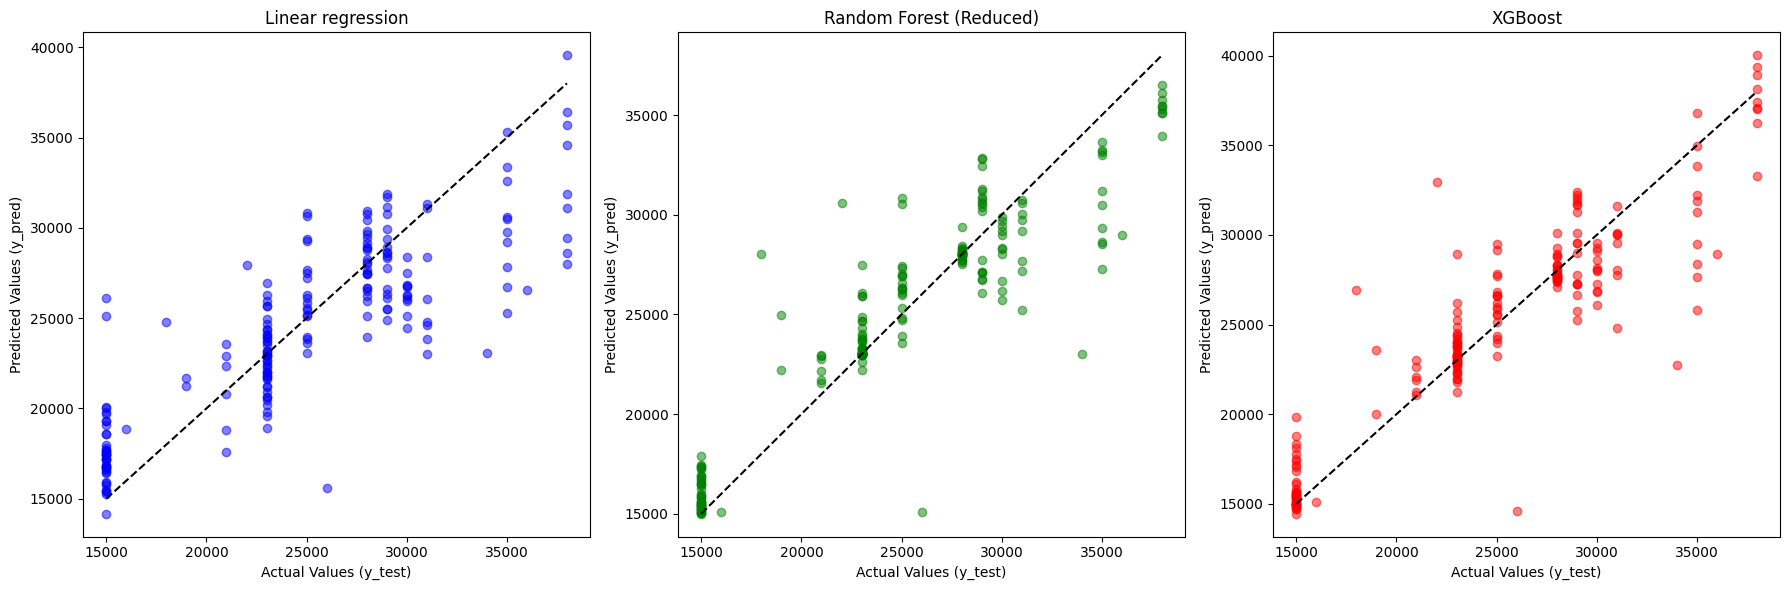

In [51]:
y_pred_ls = lasso_selected.predict(X_test_selected)  # Lasso Regression (selected features)
y_pred_rf_reduced = rf_reduced.predict(X_test_reduced)  # Reduced Random Forest
y_pred_xgb = xgb_model.predict(X_test)  # Optimized XGBoost

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatter Plot for Random Forest (Original)
axs[0].scatter(y_test, y_pred_ls, alpha=0.5, color="blue")
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")
axs[0].set_title("Linear regression")
axs[0].set_xlabel("Actual Values (y_test)")
axs[0].set_ylabel("Predicted Values (y_pred)")

# Scatter Plot for Reduced Random Forest
axs[1].scatter(y_test, y_pred_rf_reduced, alpha=0.5, color="green")
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")
axs[1].set_title("Random Forest (Reduced)")
axs[1].set_xlabel("Actual Values (y_test)")
axs[1].set_ylabel("Predicted Values (y_pred)")

# Scatter Plot for XGBoost
axs[2].scatter(y_test, y_pred_xgb, alpha=0.5, color="red")
axs[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")
axs[2].set_title("XGBoost")
axs[2].set_xlabel("Actual Values (y_test)")
axs[2].set_ylabel("Predicted Values (y_pred)")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

Fine-tune alpha (regularization strength) in Lasso and Ridge models using cross-validation can be done for linear regression model.
In case of random forest further optimize hyperparameters using GridSearchCV can be done, also experiment with non-linear feature interactions for better accuracy.for XGboost hyperparameter tuning using GridSearchCV can be perform.



In [ ]:
# saving the model
import pickle

pickle_out = open("insurancenw.pkl", mode = "wb")
pickle.dump(rf_reduced, pickle_out)
pickle_out.close()

In [ ]:
import joblib

# Load the trained model
model = joblib.load('insurancenw.pkl')

# Example input data for prediction (new input to predict premium)
input_data = {
    'Age': 20,


    'AnyTransplants': 0,  # No
    'AnyChronicDiseases': 0,  # Yes

    'HistoryOfCancerInFamily': 0,  # Yes
    'NumberOfMajorSurgeries': 0,
    'BMI': 30.0
}

# Convert the input data into a DataFrame (same format as your training data)
input_df = pd.DataFrame([input_data])

# Make prediction
prediction = model.predict(input_df)

# Output the prediction
print(f"Estimated Insurance Premium: ${prediction[0]:.2f}")

# New Section